In [ ]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Градиентный спуск

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Здесь мы используем абстрактные базовые классы (ABC) и абстрактные методы из модуля abc. Это стандартный способ создания базовых классов, которые задают обязательные методы для своих наследников.

Мы не можем создать объект абстрактного класса напрямую (класс не может быть инстанциирован). Абстрактные классы обычно используются в качестве базовых классов в иерархии наследования, содержа абстрактные методы, которые должны быть реализованы в дочерних классах.

Абстрактный метод — это метод, который объявлен в абстрактном классе и не имеет собственной реализации в этом классе.

 Абстрактные классы и методы используются для определения шаблона, которому должны соответствовать все дочерние классы.

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

Реализуем класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху.

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.mean((X.dot(w) - y) ** 2)


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2.0 / len(y) * X.transpose().dot(X.dot(w) - y)

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

Реализуем функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент (learning rate -- скорость обучения)
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    path = [None] * (n_iterations + 1)
    path[0] = w_init.copy()
    for t in range(1, n_iterations + 1):
      path[t] = path[t - 1] - lr * loss.calc_grad(X, y, path[t - 1])

    return path


Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

При помощи функций `gradient_descent` и  `plot_gd` нарисуем траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используем не менее четырёх разных значений для `lr`.

Сделаем и опишем свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Примечание:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`

lr = 0.0001


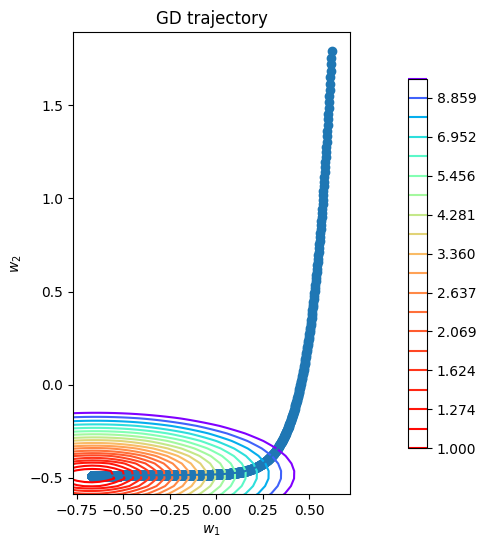

lr = 0.001


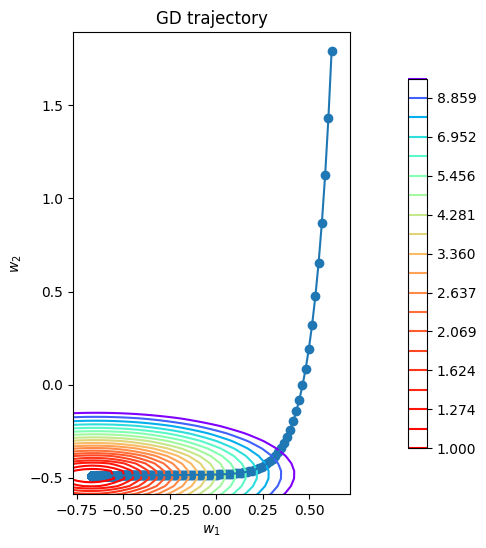

lr = 0.01


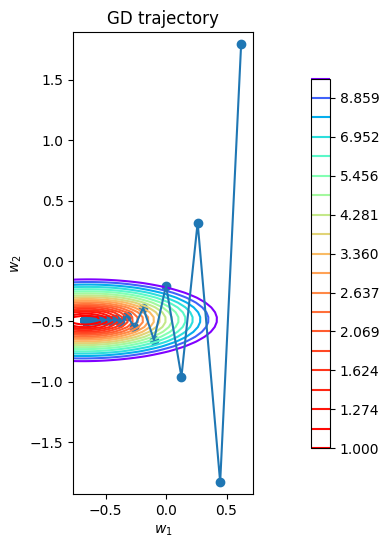

lr = 0.012


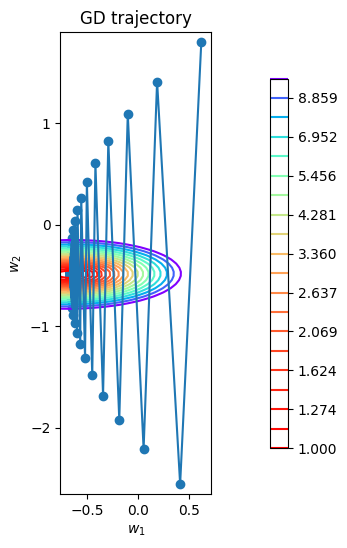

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.012]:
    w_list = gradient_descent(w_init, X, y, loss, lr)
    print(f"lr = {lr}")
    plot_gd(w_list, X, y, loss)

При выборе lr >= 0.013 появляется ошибка ValueError: Axis limits cannot be NaN or Inf. Слишком большой шаг приводит к экспоненциальному росту значений весов, что, в свою очередь, вызывает вычисление NaN или Inf.

При всех выбранных lr мы находим минимум функции за 100 итераций.

lr = 0.001 кажется наиболее оптимальным, потому что спуск происходит плавным образом, в отличие от зигзагообразной траектории при lr >= 0.01. При этом мы видим, что спуск происходит быстрее, чем при минимальном выбранном lr.

**Вывод:**
Слишком маленький lr (0.0001) приводит к долгой и неэффективной сходимости, есть вероятность, что не удастся найти минимум за 100 итераций => придется увеличивать кол-во итераций, а следовательно и время выполнения программы!
Слишком большой lr (>= 0.01) может вызвать колебания или даже расхождение алгоритма.
Оптимальный lr (0.001) позволяет достичь быстрой и стабильной сходимости.

Теперь реализуем стохастический градиентный спуск

Реализуем функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    path = [None] * (n_iterations + 1)
    path[0] = w_init.copy()

    for t in range(1, n_iterations + 1):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      path[t] = path[t - 1] - lr * loss.calc_grad(X[batch_indices], y[batch_indices], path[t - 1])

    return path


При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуем траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используем 4 разных значения для `lr` и `batch_size`.

Проанализируем, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска.

Обратим внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr = 0.0001, batch_size = 1


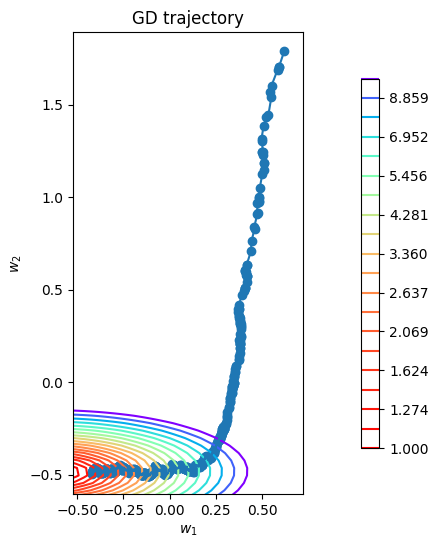

lr = 0.0001, batch_size = 10


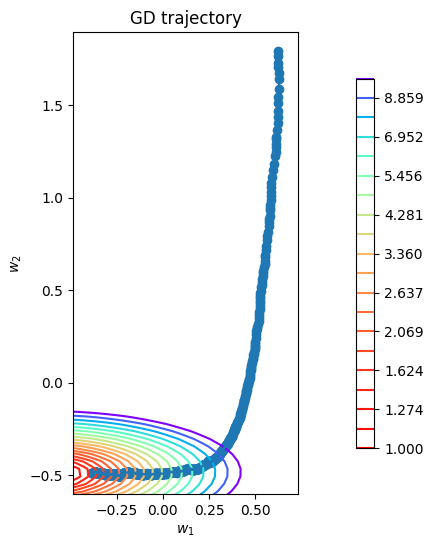

lr = 0.0001, batch_size = 100


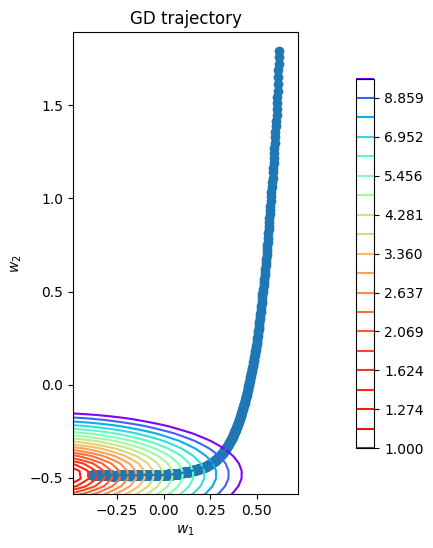

lr = 0.0001, batch_size = 300


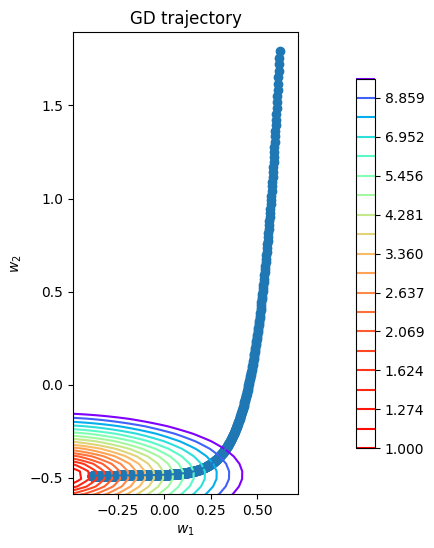

lr = 0.001, batch_size = 1


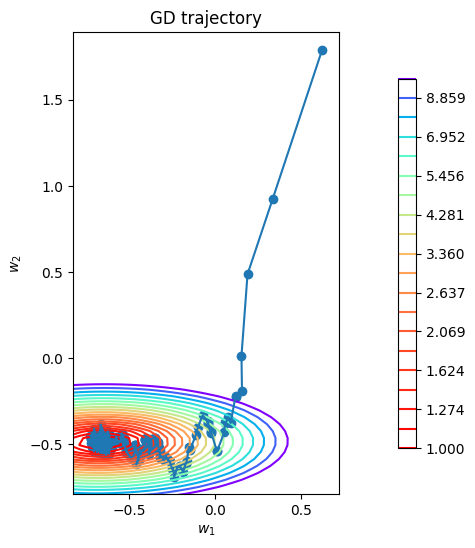

lr = 0.001, batch_size = 10


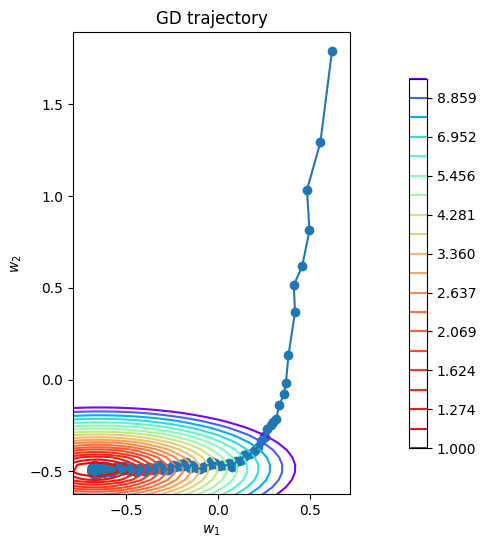

lr = 0.001, batch_size = 100


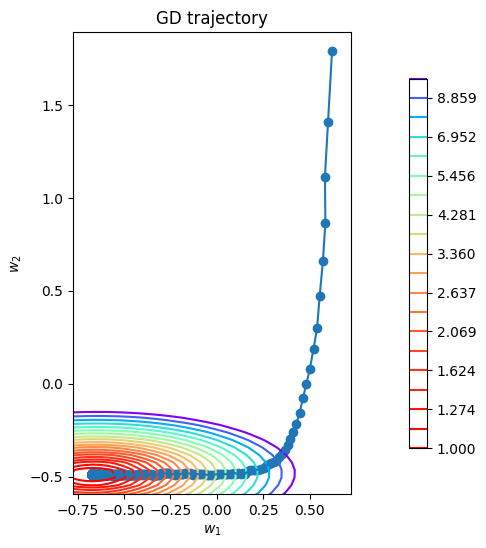

lr = 0.001, batch_size = 300


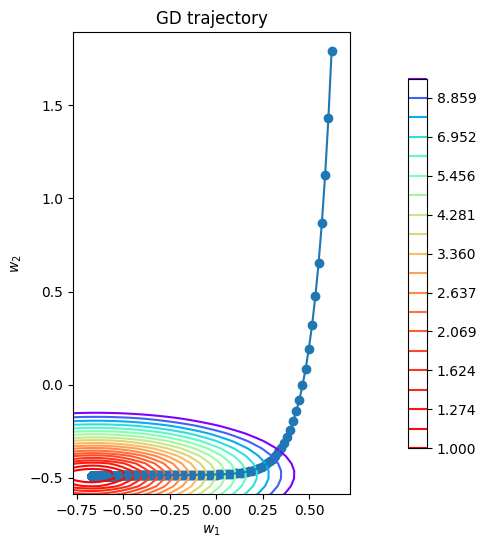

lr = 0.01, batch_size = 1


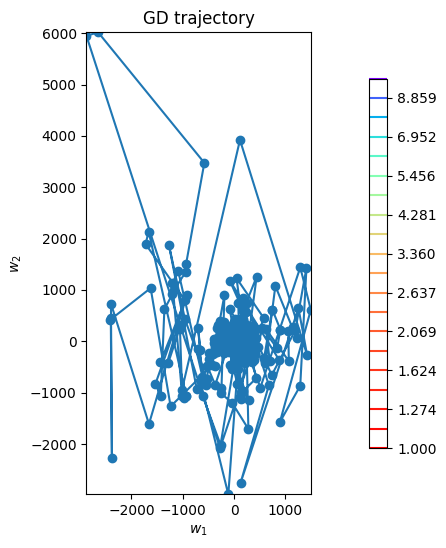

lr = 0.01, batch_size = 10


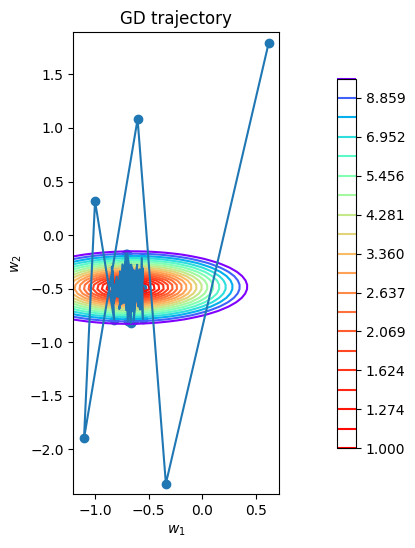

lr = 0.01, batch_size = 100


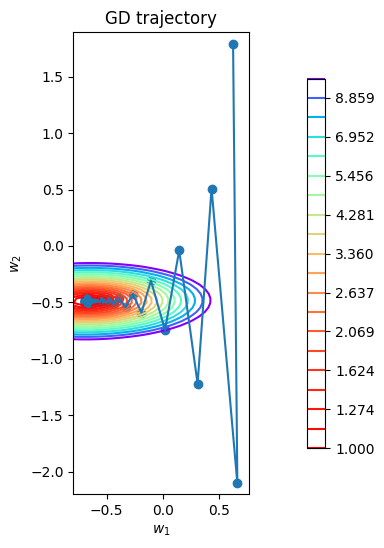

lr = 0.01, batch_size = 300


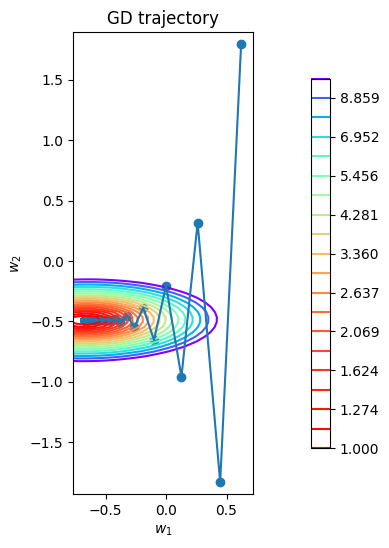

lr = 0.012, batch_size = 1


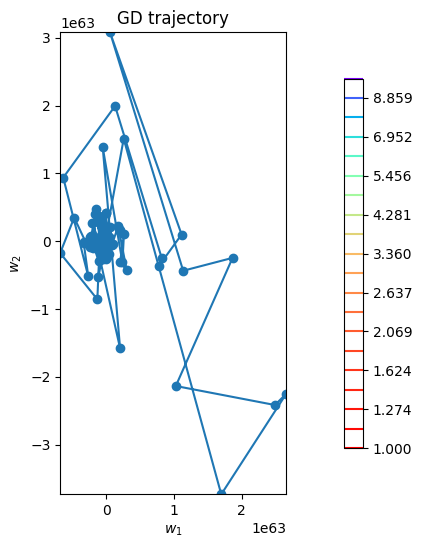

lr = 0.012, batch_size = 10


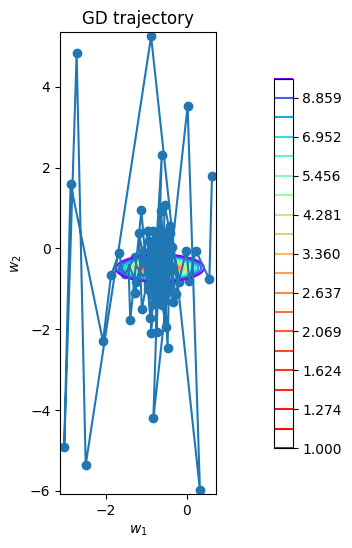

lr = 0.012, batch_size = 100


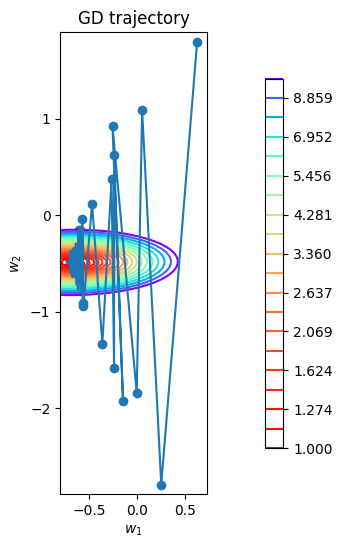

lr = 0.012, batch_size = 300


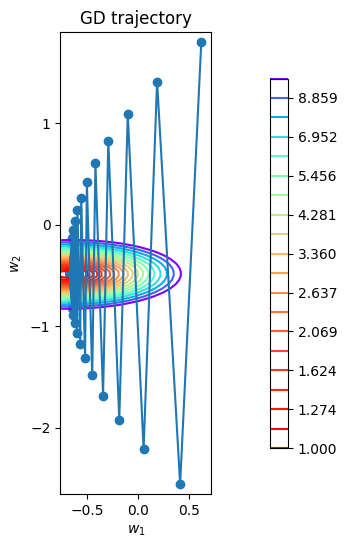

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.012]:
  for batch_size in [1, 10, 100, 300]:
      w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size)
      print(f"lr = {lr}, batch_size = {batch_size}")
      plot_gd(w_list, X, y, loss)

При слишком маленьком lr = 0.0001 вне зависимости от batch_size спуск не доходит до минимума функции из-за слишком медленной скорости обучения.

При lr = 0.001 мы найдем минимум функции. Оптимальным кажется bath_size = 10, потому что движение относительно плавное, при этом расчеты производятся достаточно быстро.

При lr = 0.01, batch_size <= 10 мы наблюдаем хаотичное зигзагообращное движение. Особенно это заметно при batch_size = 1. Действительно, при наблюдении каждый раз всего лишь за одним случайным элементом и такой величине шага не получится выстроить адекватную траекторию.
При lr = 0.01 оптимальным кажется batch_size = 100, потому что увелечиние размера до 300 не сильно улучшает ситуацию, но уменьшает скорость расчетов.

Рассуждения с lr = 0.012 анаологичны lr = 0.01, потому что эти значения очень близки.

**Вывод:**
В качестве оптимальных я выбрала бы такие параметры: lr = 0.001, bath_size = 10.

При маленьких размерах подвыборки SGD имеет более зигзагообразный спуск. За счет случайного выбора батчей SGD может быть менее стабильным, зато обеспечивает хорошую производительность. При правильном подборе lr и batch_size можно добиться хорошего результата с высокой производительностью.

Поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

Реализуем функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмем равным 1. Параметр $p$ возьмем из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    path = [None] * (n_iterations + 1)
    path[0] = w_init.copy()

    for t in range(1, n_iterations + 1):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      nt = lr * (1 / (1 + t)) ** p
      path[t] = path[t - 1] - nt * loss.calc_grad(X[batch_indices], y[batch_indices], path[t - 1])

    return path

При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуем траекторию градиентного спуска для разных значений параметра `p`. Используем 4 разных значения для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмем равным 0.01, а параметр `batch_size` равным 10.

Проанализируем, как параметр `p` влияет на поведение стохастического градиентного спуска.

p = 0.1


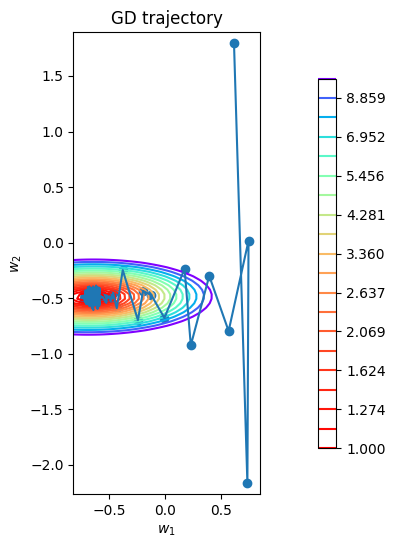

p = 0.4


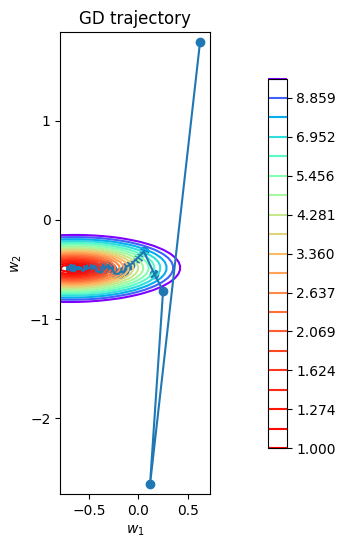

p = 0.7


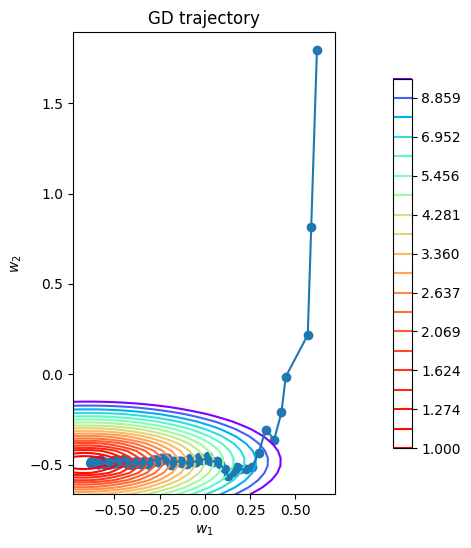

p = 1


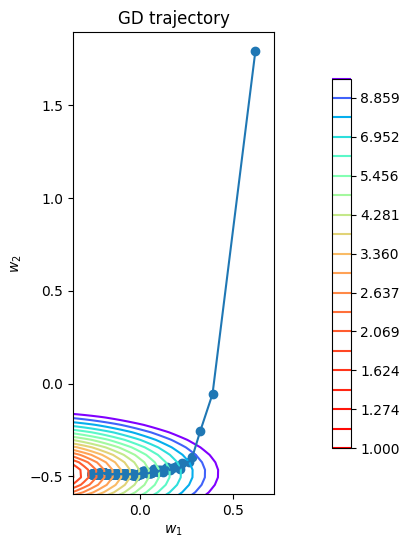

In [ ]:
lr = 0.01
batch_size = 10
for p in [0.1, 0.4, 0.7, 1]:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p)
    print(f"p = {p}")
    plot_gd(w_list, X, y, loss)

При слишком маленьком p = 0.1 движение зигзагообразное даже с увеличением номера итерации.

При p = 0.4 движение зигзагообразное в начале траектории, однако ближе к минимуму функции становится более плавным.

При p = 0.7 движение изначально немного зигзагообразное, но далее стновится плавным. По графику кажется, что спуск не дошел до минимума функции (хоть и остановился близко).

При слишкои большом p (p > 0.7) траектория плавная, но обучение происходит слишком медленно и градиентный спуск может не дойти до минимума функции.

Вывод:
При выбранных параметрах lr и batch_size я считаю оптимальным выбор p = 0.5.

Сравним сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуем график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмем равным 10.

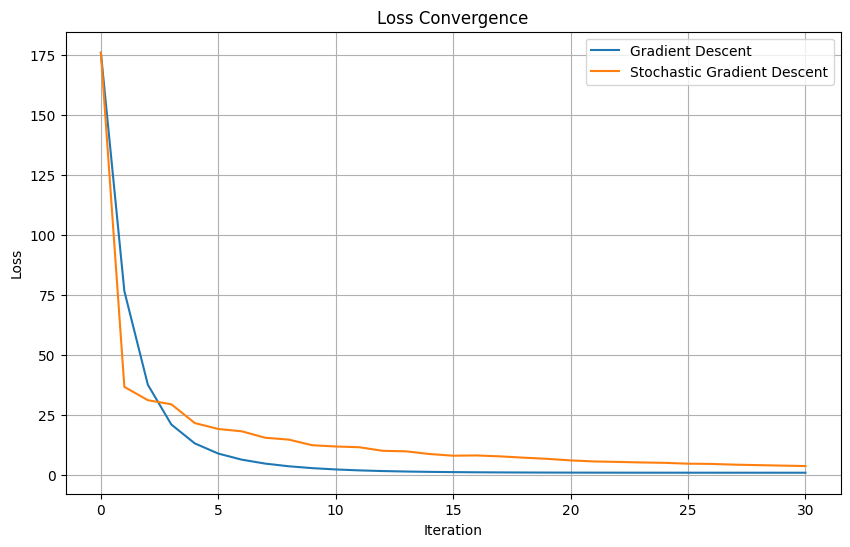

In [ ]:
lr = 0.01
n_iterations = 30
batch_size = 10
w_init = np.random.uniform(-2, 2, X.shape[1])

# Обычный градиентный спуск
w_list_gd = gradient_descent(w_init, X, y, loss, lr, n_iterations)
loss_gd = [loss.calc_loss(X, y, w) for w in w_list_gd]

# Стохастический градиентный спуск
p = 0.5
w_list_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, n_iterations)
loss_sgd = [loss.calc_loss(X, y, w) for w in w_list_sgd]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations + 1), loss_gd, label='Gradient Descent')
plt.plot(range(n_iterations + 1), loss_sgd, label='Stochastic Gradient Descent')
plt.title('Loss Convergence')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Сравним два способа оптимизации: стандартный градиентный спуск и SGD.

В начале SGD быстрее сходится к оптимуму, что видно по более крутому начальному спуску. Это может быть преимуществом SGD, так как он позволяет быстрее достигнуть низкого уровня потерь.

Линия GD плавно приближается к минимуму, а линия SGD показывает больше колебаний. Это связано с тем, что каждый шаг в SGD основан на небольшом подмножестве обучающего набора, что приводит к более "шумным" и менее точным оценкам градиента. Тем не менее, на данном графике эти колебания не очень выражены, и SGD кажется довольно стабильным.

Оба метода, судя по графику, достигают схожего значения функции потерь к концу итераций, что означает, что они оба достаточно хорошо оптимизируют функцию потерь.

Стоит учесть, что SGD требует меньше вычислений на каждом шаге, поскольку он использует только подмножество данных. При этом мы видим не сильное ухудшение качества спуска. Это значит, что SGD следует использовать для работы с большим набором данных.

## Линейная регрессия

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

Реализуем методы `fit` и `predict` класса `LinearRegression`

В методе `fit` нам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` нам нужно применить линейную регрессию и вернуть вектор ответов.

Обратим внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.random.uniform(-2, 2, X.shape[1])
        w = gradient_descent(w_init, X, y, self.loss, self.lr)
        self.w = w[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X.dot(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами.

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
print(X_raw.head())
X_raw = X_raw[~X_raw[25].isna()].reset_index()
# ~X_raw.isna() инвертирует серию булевых значений, чтобы в X_raw остались только
# те строки, в которых X_raw (target) не равет NaN

   0      1            2    3    4     5            6    7      8     9   ...  \
0   3    NaN  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
1   3    NaN  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
2   1    NaN  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  ...   
3   2  164.0         audi  gas  std  four        sedan  fwd  front  99.8  ...   
4   2  164.0         audi  gas  std  four        sedan  4wd  front  99.4  ...   

    16    17    18    19    20     21      22  23  24       25  
0  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  13495.0  
1  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  16500.0  
2  152  mpfi  2.68  3.47   9.0  154.0  5000.0  19  26  16500.0  
3  109  mpfi  3.19  3.40  10.0  102.0  5500.0  24  30  13950.0  
4  136  mpfi  3.19  3.40   8.0  115.0  5500.0  18  22  17450.0  

[5 rows x 26 columns]


In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
X_raw = X_raw.drop(columns='index')
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


Как обычно обработаем датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделим датасет на обучающую и тестовую выборку
* Заполним пропуски
* Нормализуем числовые признаки
* Закодируем категориальные переменные

In [ ]:
from sklearn.model_selection import train_test_split

# Определение числовых и категориальных признаков
num_features = X_raw.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_raw.select_dtypes(include=['object']).columns

mean_values = X_raw[num_features].mean()
std_values = X_raw[num_features].std()

# Заполнение пропусков для числовых признаков
for col in num_features:
    X_raw[col].fillna(mean_values[col], inplace=True)
    # fillna() заполняет NaN в столбце средними значениями этого столбца

# Стандартизация числовых признаков
X_raw[num_features] = (X_raw[num_features] - mean_values) / std_values

# Заполнение пропусков для категориальных признаков
for col in cat_features:
    X_raw[col].fillna(X_raw[col].mode()[0], inplace=True)
    # X_raw[col].mode()[0] возвращает моды столбца, то есть наиболее часто встречающееся значение.
    # Поскольку может быть несколько мод, мы обращаемся к элементу с индексом 0

# Кодирование категориальных переменных (One-Hot Encoding)
X_raw = pd.get_dummies(X_raw, columns=cat_features)

# Разделение датасета на обучающую и тестовую выборку
# 80% данных для обучения и 20% данных для тестирования
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)
# random_state=42 -- параметр, который позволяет результату разделения быть воспроизводимым.

print(X_train.head())
print(X_test.head())

            0         1         9        10        11        12        13  \
198 -1.467002 -0.761804  1.698379  1.184775  1.432780  0.708112  0.882150   
38  -0.670063 -1.043954 -0.378648  0.097305 -0.327892  0.136175 -0.486503   
24   0.126876  0.733589 -0.840209 -1.371592 -0.994092 -1.293667 -1.095438   
122  1.720753  1.805759 -0.708334 -0.430200  1.147266 -1.457078  0.429798   
196 -1.467002 -0.761804  1.698379  1.184775  1.432780  0.708112  0.766162   

           16        18        19  ...  15_twelve  15_two  17_1bbl  17_2bbl  \
198  1.110178  0.920589 -1.211890  ...      False   False    False    False   
38  -0.406183 -0.667338  1.012029  ...      False   False     True    False   
24  -0.887568 -1.332051 -0.084269  ...      False   False    False     True   
122  0.580655  2.250015 -0.460143  ...      False   False    False    False   
196  0.339963  1.659159 -0.334852  ...      False   False    False    False   

     17_4bbl  17_idi  17_mfi  17_mpfi  17_spdi  17_spfi  
198 

Обучим написанную нами линейную регрессию на обучающей выборке

In [ ]:
linear_regression.fit(X_train, y_train)

Посчитаем ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [ ]:
from sklearn.metrics import mean_squared_error

# Сделаем предсказания на обучающей и тестовой выборке
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)

# Рассчитаем MSE для обучающей и тестовой выборки
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Выведем результаты
print(f'MSE on training data: {mse_train}')
print(f'MSE on test data: {mse_test}')

MSE on training data: 1393342.840732493
MSE on test data: 10655281.79511444


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

Реализуем класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Обратим внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем, bias регуляризовать не нужно. Поэтому уберем последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулим его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return np.mean(np.square(X.dot(w)-y)) + self.coef * np.sum(np.square(w[:-1]))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 * X.T.dot((X.dot(w) - y)) / len(y) + 2 * self.coef * np.concatenate([w[:-1], [0]])

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

Обучим регрессию с лоссом `MSEL2Loss`. Подберем хороший коэффициент регуляризации и добьемся улучшения результата на тестовой выборке. Сравним результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.003))
linear_regression.fit(X_train, y_train)

# Сделаем предсказания на обучающей и тестовой выборке
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)

# Рассчитаем MSE для обучающей и тестовой выборки
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Выведем результаты
print(f'MSE on training data: {mse_train}')
print(f'MSE on test data: {mse_test}')

MSE on training data: 1656495.5539788213
MSE on test data: 8433992.345922293


**Без регуляризации**
MSE on training data: 1393342.840732493
MSE on test data: 10655281.79511444

**С регуляризацией**
MSE on training data: 1656495.5539788213
MSE on test data: 8433992.345922293

Ошибка на тесте стала больше, а на выборке меньше. Значит, мы частично справились с переобучением!

В нашем датасете могут быть выбросы. С выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

Реализуем класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X.dot(w) - y
        return np.mean(np.where(np.abs(z) < self.eps, 0.5 * z ** 2, self.eps * (np.abs(z) - 0.5 * self.eps)))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = X.dot(w) - y
        grad_conditions = np.where(np.abs(z) < self.eps, z, self.eps * np.sign(z))
        return X.T.dot(grad_conditions) / len(y)

Обучим регрессию с лоссом `HuberLoss`. Сравним результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [ ]:
loss = HuberLoss(4500)
linear_regression = LinearRegression(loss)
linear_regression.fit(X_train, y_train)

# Сделаем предсказания на обучающей и тестовой выборке
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)

# Рассчитаем MSE для обучающей и тестовой выборки
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Выведем результаты
print(f'MSE on training data: {mse_train}')
print(f'MSE on test data: {mse_test}')

MSE on training data: 1393356.5838994342
MSE on test data: 10651758.01868347


При eps = 4500 в **HuberLoss** достигается

MSE on training data: 1393356.5914877641

MSE on test data: 10651836.765060192.

**MSELoss**

MSE on training data: 1393342.840732493

MSE on test data: 10655281.79511444

**Удалось добиться незначительных улучшений**
